¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero que nada hay que mandar llamar a la librería pandas para poder leer los archivos csv mediante el método read_csv(), este recibe como argumento la ruta donde se encuentran los archivos csv, al abrir cada uno de los archivos csv se puede observar que todos los datos vienen separados por punto y coma,  por lo cual es necesario usar argumento sep = ‘;’ en read_csv() para indicar a pandas que este es el delimitador del archivo, después se usa el método info() que mostrará la información general de toda la tabla. Este muestra número de filas, número de columnas, nombre de cada columna, número de valores que están ausentes y el tipo de datos de cada columna. También será necesario hacer uso de matplotlib que servirá para crear las gráficas en los ejercicios. 

In [62]:
import pandas as pd # importar librería pandas
from matplotlib import pyplot as plt # importar librería para crear gráficos

In [63]:
# Leer conjuntos de datos en los DataFrames, al abrir los conjuntos de datos se observa que todos vienen separados por punto y coma ;
# Por esta razón en todos se esta usando el parametro sep = ';' para especificar a pandas que ese es el delimitador.
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') # Lectura df instacart_orders.csv
df_products = pd.read_csv('/datasets/products.csv', sep=';') # Lectura df instacart_orders.csv
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';') # Lectura df aisles.csv
df_departments = pd.read_csv('/datasets/departments.csv', sep=';') # Lectura df departments.csv
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';') # Lectura df order_products.csv

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [64]:
# mostrar información del DataFrame instacart_orders
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [65]:
# mostrar información del DataFrame products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [66]:
# mostrar información del DataFrame aisles
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [67]:
# mostrar información del DataFrame departments
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [68]:
# mostrar información del DataFrame order_products
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Una vez revisada la información con el método info() en cada uno de los conjuntos de datos se puede observar que todos los id 's son un tipo de datos int64, esto funciona para continuar con el procesamiento de los datos. Se puede observar también que algunos de los nombres de algunas columnas no describen claramente los datos que almacenan, por ello será necesario renombrarlas apropiadamente para entender los datos que almacenan. Así mismo, también se puede observar que algunos de los tipos de datos en las columnas no son convenientes para poder trabajar con ellos, de igual modo será necesario realizar cambios en esta parte.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

En el conjunto de datos instacart_orders se puede destacar que order_hour_of_day es conveniente convertirlo a tipo de dato datetime, en la columna days_since_prior_order a un tipo int64 y también se puede observar que existen valores ausentes. Para el conjunto de datos products. csv en la columna product_name existen valores ausentes. En el conjunto de datos aisles.csv es adecuado cambiar el nombre de la columna aisle por aisle_name para entender qué datos guarda, al igual que en el conjunto departments.csv renombrar la columna department por department_name. Por último en el conjunto order_products.csv es conveniente cambiar el tipo de datos para la columna add_to_cart_order por int64, así mismo en esta columna se puede observar que existen valores ausentes. De igual modo se debe revisar cuántos valores duplicados existen en cada uno de los conjuntos de datos y eliminarlos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [69]:
# Revisa si hay pedidos duplicados, con los métodos duplicated().sum() para saber si hay y cuántos son
print('Total de pedidos duplicados: ', df_instacart_orders.duplicated().sum())
df_instacart_orders[df_instacart_orders.duplicated()]

Total de pedidos duplicados:  15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? Si hay duplicados, lo que tienen en común es que todos los pedidos se realizaron el día miércoles a la misma hora.

In [70]:
# Basándote en tus hallazgos,verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
# Se hace mediante un filtado del dataframe y el operador de comparación &
df_instacart_orders[(df_instacart_orders['order_dow']==3) & (df_instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?
Este resultado sugiere que existen 121 órdenes que se realizaron el día miércoles a las 2:00 a.m. 

In [71]:
# Elimina los pedidos duplicados, se esta usando el metodo drop_duplicates() junto reset_index(), 
# el argumento drop=True para reestablecer los indices y subset='order_id'para eliminar duplicados solo en esa columna.
df_instacart_orders = df_instacart_orders.drop_duplicates(subset='order_id').reset_index(drop=True)
print(df_instacart_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [72]:
# Vuelve a verificar si hay filas duplicadas
print('Filas duplicadas: ', df_instacart_orders.duplicated().sum())

Filas duplicadas:  0


In [73]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('IDs duplicados de pedidos: ', df_instacart_orders['order_id'].duplicated().sum())

IDs duplicados de pedidos:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se puede observar que después de haber aplicado el método drop_duplicates(), el argumento subset con el nombre de la columna order_id y  haciendo la reasignación al mismo conjunto de datos ya no aparecen filas ni ID’s de pedidos duplicados. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen análisis de duplicados. Pero cuando elimines los duplicados te sugiero escribirlo sobre la misma base de datos para que se quede guardado. 
</div>

### `products` data frame

In [74]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [75]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products['department_id'].duplicated().sum()

49673

In [76]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'].duplicated().sum()
df_products['product_name'] = df_products['product_name'].str.upper()
print(df_products.head())

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [77]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_duplicated_name = df_products[(df_products['product_name'].duplicated().sum()) & (~df_products['product_name'].isna())] 

print('Nombres duplicados de productos no faltantes: ', df_products_duplicated_name['product_name'].duplicated().sum())

Nombres duplicados de productos no faltantes:  104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dentro del conjunto de datos products se puede observar que existen en los nombres de los productos, también fue necesario poner todos con mayúscula para poder compararlo mejor, Respecto a los nombres duplicados de productos no faltantes podemos decir que existen 104 nombres duplicados de productos en existencia.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados. Para complementar el análisis, qué podríamos decir de estos 104 productos duplicados? 
    
</div>

### `departments` data frame

In [78]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas en departments', df_departments.duplicated().sum())

Filas totalmente duplicadas en departments 0


In [79]:
# Revisa únicamente si hay IDs duplicadas de productos
# Se realizó también el cambio de nombre de la columna department por department_name
print('Id de departamentos dupliacdos en departments: ', df_departments['department_id'].duplicated().sum())
columns_new = {'department': 'department_name'}
df_departments = df_departments.rename(columns = columns_new)
print(df_departments.columns)

Id de departamentos dupliacdos en departments:  0
Index(['department_id', 'department_name'], dtype='object')


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dentro de este conjuntos de datos no existen valores duplicados, sólo se hizo el cambio de nombre de la columna de department a department_name, esto con el fin de darle un nombre más descriptivo a la columna.

### `aisles` data frame

In [80]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas en aisles: ', df_aisles.duplicated().sum())

Filas totalmente duplicadas en aisles:  0


In [81]:
# Revisa únicamente si hay IDs duplicadas de productos
# Se realizó también el cambio de nombre de la columna aisle por aisle_name
print('IDs duplicadas de productos en aisles: ', df_aisles['aisle_id'].duplicated().sum())
columns_new = {'aisle': 'aisle_name'}
df_aisles = df_aisles.rename(columns = columns_new)
print(df_aisles.columns)

IDs duplicadas de productos en aisles:  0
Index(['aisle_id', 'aisle_name'], dtype='object')


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al igual que el conjunto de datos anterior se puede observar que no existen valores duplicados, sólo se hizo el cambio de nombre de la columna de aisle a aisle_name, esto con el fin de darle un nombre más descriptivo a la columna.

### `order_products` data frame

In [82]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas en order_products: ', df_order_products.duplicated().sum())

Filas totalmente duplicadas en order_products:  0


In [83]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Total de ids de orden duplicados: ', df_order_products['order_id'].duplicated().sum())
print ('Total de ids de productos duplicados: ', df_order_products['product_id'].duplicated().sum())
#df_order_products[df_order_products['order_id'].duplicated()]

Total de ids de orden duplicados:  4094961
Total de ids de productos duplicados:  4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este conjunto de datos se observa que no existen filas duplicadas pero si existen duplicados en las columnas order_id y product_id, se realizó la sumatoria para encontrar el total de duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [84]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Total valores ausentes en product_name:', df_products['product_name'].isna().sum())
df_products[df_products['product_name'].isna()]


Total valores ausentes en product_name: 1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Se encontraron 1258 valores ausentes en la columna product_name del conjunto de datos products, de los cuales a simple vistase puede notar que pertenecen al departamneo 21 y pasillo 100. 

In [85]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_aisle = df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100)]
print('Total de productos ausentes relacionados con el pasillo con ID 100:', df_products_aisle['product_name'].isna().sum())

Total de productos ausentes relacionados con el pasillo con ID 100: 1258


Describe brevemente cuáles son tus hallazgos.
Se realizó un filtro para comprobar si todos los valores ausentes están relacionados con el pasillo con ID 100 y esto es correcto.

In [86]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products_depart = df_products[(df_products['product_name'].isna()) & (df_products['department_id']==21)]
print('Total de productos ausentes relacionados con el departamento con ID 21:', df_products_depart['product_name'].isna().sum())


Total de productos ausentes relacionados con el departamento con ID 21: 1258


Describe brevemente cuáles son tus hallazgos.

Se realizó un filtro para comprobar si todos los valores ausentes están relacionados con el departamento con ID 21 y esto es correcto.

In [87]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_departments[df_departments['department_id']==21])
print(df_aisles[df_aisles['aisle_id']==100])

    department_id department_name
20             21         missing
    aisle_id aisle_name
99       100    missing


Describe brevemente cuáles son tus hallazgos.
Se puede observar que el nombre para cada uno de estos datos aparaece como 'missing' es decir como faltante.

In [88]:
# Completa los nombres de productos ausentes con 'Unknown' usando el método fillna pasando como argumneto el string
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print('Total de valores ausentes en product_name: ', df_products['product_name'].isna().sum())

Total de valores ausentes en product_name:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se llenaron los valores ausentes con la cadena 'Unknown' y se volvieron a llamar los métodos isna().sum() para comprobar que ya no existen valores ausentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de valores faltantes y los llenaste con "unknown".
    
</div>

### `orders` data frame

In [89]:
# Encuentra los valores ausentes
print('Valores ausentes en instacart_orders: ', df_instacart_orders.isna().sum())

Valores ausentes en instacart_orders:  order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [90]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_order=df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (~df_instacart_orders['order_number']==1)]
print(df_order)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 28819 valores ausentes y posteriormente se realizo un filtro para comprobar que si hay valor ausente que no sea el primer pedido del cliente.

### `order_products` data frame

In [91]:
# Encuentra los valores ausentes
print('Total de valores ausentes: ',df_order_products['add_to_cart_order'].isna().sum()) # Cuenya cuantos nan existen
print()
print(df_order_products[df_order_products['add_to_cart_order'].isna()])  # Muestra las filas con valores nan

Total de valores ausentes:  836

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [92]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor mínimo: ', df_order_products['add_to_cart_order'].min(), '\nValor máximo: ', df_order_products['add_to_cart_order'].max())

Valor mínimo:  1.0 
Valor máximo:  64.0


Describe brevemente cuáles son tus hallazgos.

Dentro del conjunto de datos order_products se puede observar que existen 836 valores ausentes que se encuentran en la columna add_to_cart_order. dentro de esta columna se puede notar que el valor máximo es de 64 y el mínimo de 1

In [93]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print('IDs de pedidos que tengan un valor ausente en add_to_cart_order: ', df_order_products['add_to_cart_order'].isna().sum())
print()
miss_add = df_order_products.query("add_to_cart_order.isna()")[['order_id', 'add_to_cart_order', 'product_id']]
print(miss_add)

IDs de pedidos que tengan un valor ausente en add_to_cart_order:  836

         order_id  add_to_cart_order  product_id
737       2449164                NaN        5068
9926      1968313                NaN       43867
14394     2926893                NaN       11688
16418     1717990                NaN        4142
30114     1959075                NaN       42828
...           ...                ...         ...
4505662   1800005                NaN        7411
4511400   1633337                NaN         260
4517562    404157                NaN        9517
4534112   1673227                NaN       17835
4535739   1832957                NaN       17949

[836 rows x 3 columns]


In [94]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
values_64 = miss_add[(miss_add['order_id'] > 64) & (miss_add['add_to_cart_order'].isna())] 
print(values_64,'\n')
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
miss_val_id = values_64.query("add_to_cart_order.isna()")[['order_id', 'product_id']]
print(miss_val_id,'\n')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
count_id = miss_val_id['product_id'].count()
print(count_id.min(),'\n')

         order_id  add_to_cart_order  product_id
737       2449164                NaN        5068
9926      1968313                NaN       43867
14394     2926893                NaN       11688
16418     1717990                NaN        4142
30114     1959075                NaN       42828
...           ...                ...         ...
4505662   1800005                NaN        7411
4511400   1633337                NaN         260
4517562    404157                NaN        9517
4534112   1673227                NaN       17835
4535739   1832957                NaN       17949

[836 rows x 3 columns] 

         order_id  product_id
737       2449164        5068
9926      1968313       43867
14394     2926893       11688
16418     1717990        4142
30114     1959075       42828
...           ...         ...
4505662   1800005        7411
4511400   1633337         260
4517562    404157        9517
4534112   1673227       17835
4535739   1832957       17949

[836 rows x 2 columns] 



Describe brevemente cuáles son tus hallazgos.
En esta sección se puede notar que aunque existen valores ausentes en la columna add_to_cart_order hay información relevante en la cantidad de productos que los clientes solicitan. 

In [95]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Una vez completados todos los valores en la columna add_to_cart_order ya se pudo cambiar el tipo de datos a int, que es más adecuado para esta columna. Se puede decir también que las órdenes que tienen más de 64 productos en realidad nunca fueron agregados por los clientes a sus carritos de compra o bien que puede haber alguna falla que no este guardando la información cuando la cantidad pasa de 64. 

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buena conclusión de esta base. Pero qué podríamos decir de los pedidos que tienen más de 64 productos?
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Trabajar con el preprocesamiento de datos ha resultado una tarea difícil pero necesaria para poder preparar los datos para poder comenzar con el análisis. Saber cuales son los métodos adecuados es algo hasta el momento ha sido complicado ya que es complicado recordar toda la teoría para poder aplicarla en la práctica, pero de eso se trata de practicar para poder aprender. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [96]:
# Se crea un filtro para comprobar que los valores en la columna order_hour_of_day de df_instacart_orders esten entre 0 y 23
# Corresponde a los horas del día empezando por 0 que serían 12 a.m. con un formato de 24 horas.
order_h = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] >=0) & (df_instacart_orders['order_hour_of_day'] <=23)]
print(order_h)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [97]:
# Se crea un filtro para comprobar que los valores en la columna order_dow de df_instacart_orders esten entre 0 y 6.
# Corresponde a los días de la semana empezando por 0 que sería domingo.
order_d = df_instacart_orders[(df_instacart_orders['order_dow'] >=0) & (df_instacart_orders['order_dow'] <=6)]
print(order_d)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

Escribe aquí tus conclusiones

Con los filtros de dataframe creados se puede observar que los datos para las columnas order_hour_of_day y order_dow cumplen con las oscilaciones de valores respectivamente. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

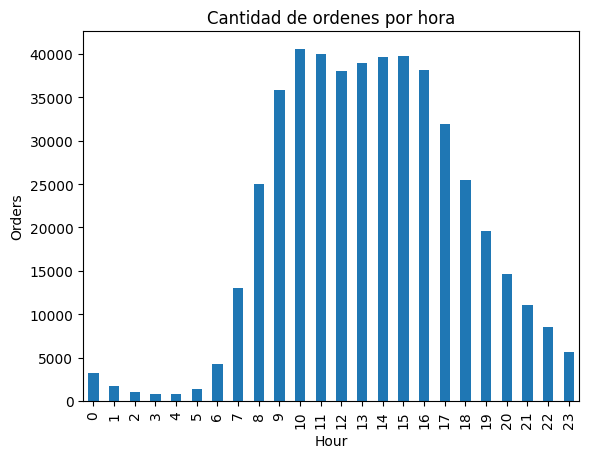

In [98]:
# Se crea una agrupación en el conjunto df_instacart_orders para saber cuántos pedidos hicieron los usuarios durante cada hora del día.
# Posteriormente se crea la gráfica para mostrar los resultados.
hour_day = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
hour_day.plot(kind='bar', 
              title='Cantidad de ordenes por hora',
              xlabel='Hour',
              ylabel='Orders',
              xlim=[0,23]
              )
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buen trabajo el desarrollar una gráfica para visualizar los resultados
</div>

Escribe aquí tus conclusiones
De acuerdo a los resultados mostrados en la gráfica se puede observar que los clientes compran más entre las 10 y 11 am, haciendo alrededor de 40,000 órdenes.

### [A3] ¿Qué día de la semana compran víveres las personas?

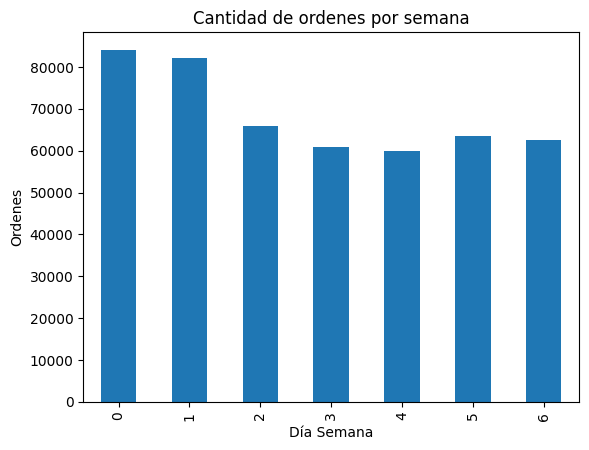

In [99]:
# Se crea una agrupación en el conjunto df_instacart_orders para saber cuántos pedidos hicieron los usuarios durante cada día de la semana.
# Posteriormente se crea la gráfica para mostrar los resultados.
week_day = df_instacart_orders.groupby('order_dow')['order_id'].count()
week_day.plot(kind='bar', 
              title='Cantidad de ordenes por semana',
              xlabel='Día Semana',
              ylabel='Ordenes')
plt.show()

Escribe aquí tus conclusiones
En esta gráfica se observa que los clientes compran más los días domingo y lunes, haciendo alrededor de 80,000 órdenes durante esos días. De martes a sábado hay un número similar de órdenes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

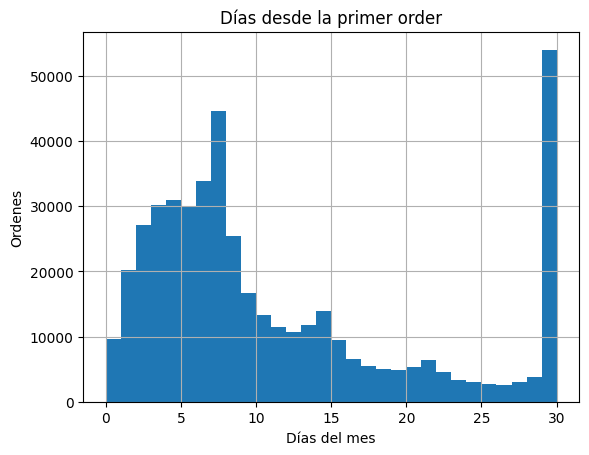

In [100]:
# Se hace una gráfica para saber valores máximos y mínimos de la columna days_since_prior_order, para saber cuanto días espera los clientes para hacer otro pedido.
df_instacart_orders.hist(column='days_since_prior_order', bins=30)
plt.title('Días desde la primer order')
plt.xlabel('Días del mes')
plt.ylabel('Ordenes')
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Si bien los resultados que muestras dan buena interpretación de los resultados, te recomiendo también hacer uso de la gráfica de barras para estos análisis. 
</div>

Escribe aquí tus conclusiones

Como se muestra en el histograma, se puede observer un pico en el día 30 lo cual indica que es el máximo de la días que pasan para que las personas vuelvan a hacer un pedido, tambien un mínimo de 0, lo que significa que las personas vuelven a hacer pedidos el mismo día. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [101]:
# Se crea un filtro para saber si los valores 3 y 6, miércoles y sábado respectivamnete, con el método isin()
wed_sat = df_instacart_orders[df_instacart_orders['order_dow'].isin([3,6])]
print(wed_sat)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
6        2511640   148233            40          3                  8   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
16       3109465    55090            19          3                 15   
...          ...      ...           ...        ...                ...   
478939    984024    47076             2          6                 21   
478941    640934    27104             9          3                 10   
478946   3006133    34561             7          6                 10   
478948   3270802   112087             2          3                 13   
478950    216274     4391             3          3                  8   

        days_since_prior_order  
0                         30.0  
6                          2.0  
11                      

In [102]:
# Se crea una pivot table con los argumentos mostrados para cuantas ordenes hacen los usuarios durante  miércoles y sábado
graph = wed_sat.pivot_table(index='order_hour_of_day', columns = 'order_dow', values='order_id', aggfunc = 'count')
print(graph)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


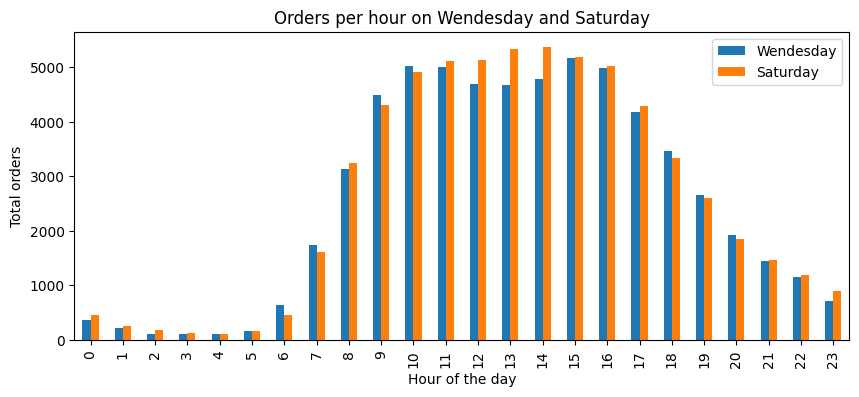

In [103]:
# Se usa el método plot para mostras los resultados en una gráfica de barras.
graph.plot(kind='bar',
          title='Orders per hour on Wendesday and Saturday',
          xlabel='Hour of the day',
          ylabel='Total orders',
          figsize=[10,4],)
plt.legend(['Wendesday', 'Saturday'])
plt.show()

Escribe aquí tus conclusiones

El día sábado es cuando se realizan más pedidos en un rango de horas de 10 a 16, para el miércoles se realizan más pedidos durante las 10, 15 y 16 horas. Aun asi el dia sabado los pedidos siguen siendo más.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [104]:
# Se usa un groupby para saber cuántos pedidos hacen los clientes, es decir, cuantos hicieron un solo pedido, cuantos dos y así sucesivamente. 
count_client = df_instacart_orders.groupby('user_id')['order_id'].count().value_counts()
print(count_client)

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
22       23
21       22
23       19
24        3
25        1
26        1
28        1
Name: order_id, dtype: int64


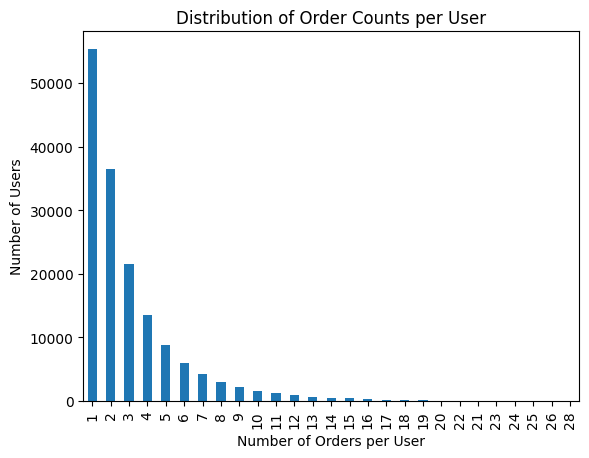

In [105]:
# Aquí se muestra la gráfica con los resultados obtenidos del filtro anterior.
count_client.plot(kind='bar')
plt.xlabel('Number of Orders per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Order Counts per User')
plt.show()

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [106]:
# Se hace un merge entre products y order_producs para poder usar las columnas necesarias y posteriormente hacer los filtros.
merge_prod = df_products.merge(df_order_products, on='product_id')
print(merge_prod)

         product_id                product_name  aisle_id  department_id  \
0                 1  CHOCOLATE SANDWICH COOKIES        61             19   
1                 1  CHOCOLATE SANDWICH COOKIES        61             19   
2                 1  CHOCOLATE SANDWICH COOKIES        61             19   
3                 1  CHOCOLATE SANDWICH COOKIES        61             19   
4                 1  CHOCOLATE SANDWICH COOKIES        61             19   
...             ...                         ...       ...            ...   
4545002       49694     BURRITO- STEAK & CHEESE        38              1   
4545003       49694     BURRITO- STEAK & CHEESE        38              1   
4545004       49694     BURRITO- STEAK & CHEESE        38              1   
4545005       49694     BURRITO- STEAK & CHEESE        38              1   
4545006       49694     BURRITO- STEAK & CHEESE        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [107]:
# En esta parte se hace groupby para cuantas órdenes se hacen de cada producto. 
prod_20 = merge_prod.groupby(['product_name', 'product_id'])['order_id'].count()
print(prod_20)

product_name                                                                             product_id
#2 COFFEE FILTERS                                                                        25773         110
#2 CONE WHITE COFFEE FILTERS                                                             2158            2
#2 MECHANICAL PENCILS                                                                    26685           3
#4 NATURAL BROWN COFFEE FILTERS                                                          26381          39
& GO! HAZELNUT SPREAD + PRETZEL STICKS                                                   20604          15
                                                                                                      ... 
\"DARN GOOD\" CHILI MIX                                                                  10559           5
\"IM PEI-NUT BUTTER\" DOUBLE CHOCOLATE COOKIE & PEANUT BUTTER ICE CREAM                  13817          20
\"LOUIS BA-KAHN\" CHOCOLATE CHIP COOKIE & BR

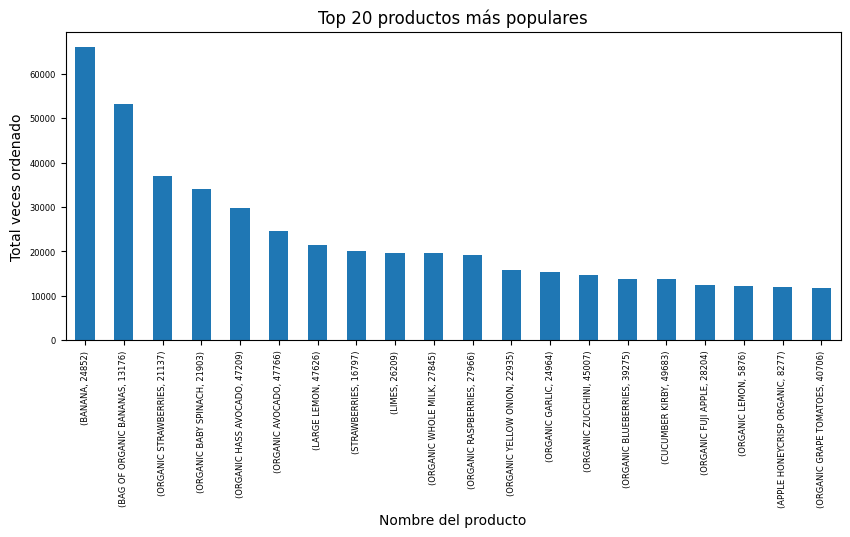

In [112]:
# Aquí se hace ordenan el filtro en orden descendente para mostrar los 20 productos que más se venden.
prod_20_sort = prod_20.sort_values(ascending=False)
prod_20_sort_graph = prod_20_sort.head(20)
#print(prod_20_sort.head(20))
prod_20_sort_graph.plot(kind='bar', 
                title='Top 20 productos más populares',
                xlabel='Nombre del producto',
                ylabel='Total veces ordenado',
                fontsize=6,
                figsize=[10,4],)
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Podrías complementar este análisis con una gráfica de barras de la popularidad de los productos. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

Escribe aquí tus conclusiones

Se puede observar que los productos organicos son los que mas se venden. Como muestra la gráfica las bananas son el producto más popular entre los clientes.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
# Se hace un merge entre instacart_orders y order_producs para poder usar las columnas necesarias y posteriormente hacer los filtros.
prod_order  = df_instacart_orders.merge(df_order_products, on='order_id')
print(prod_order)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4545148   2071924     1730            18          1                 14   
4545149   2071924     1730            18          1                 14   
4545150   2071924     1730            18          1                 14   
4545151   2071924     1730            18          1                 14   
4545152   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  
0                          30.0    

In [52]:
# Aquí se hace un filtro para saber cuántos artículos compraron los usuarios en cada orden.
total_prod = prod_order.groupby('order_id')['product_id'].count().value_counts()
print(total_prod)

5      31922
6      31699
4      31054
7      30821
3      29045
       ...  
80         1
87         1
85         1
72         1
127        1
Name: product_id, Length: 90, dtype: int64


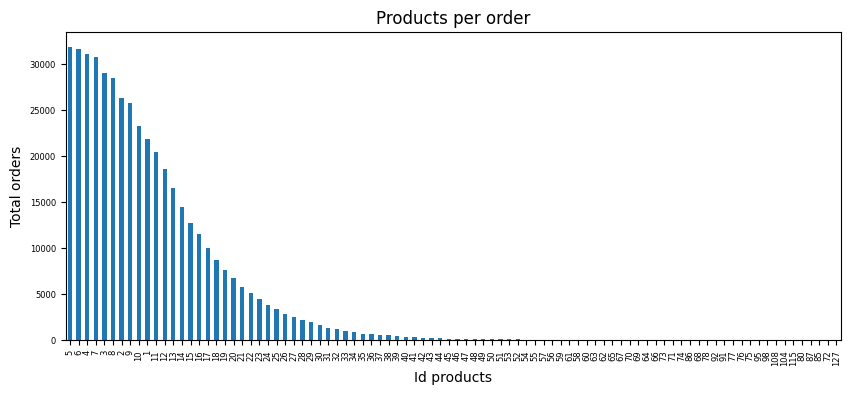

In [53]:
# Se hace una gráfica para mostrar cuántos artículos compraron los usuarios en cada orden
total_prod.plot(kind='bar', 
                title='Products per order',
                xlabel='Id products',
                ylabel='Total orders',
                fontsize=6,
                figsize=[10,4],)
plt.show()

Escribe aquí tus conclusiones

Como se observa en la gráfica hay productos que se ordenan más de 30 mil veces, lo cual también puede indicar que son productos populares.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
# Se hace un merge entre products y order_producs para poder usar las columnas necesarias y posteriormente hacer los filtros.
merge_prod_order = df_products.merge(df_order_products, on='product_id')
print(merge_prod_order)

         product_id                product_name  aisle_id  department_id  \
0                 1  CHOCOLATE SANDWICH COOKIES        61             19   
1                 1  CHOCOLATE SANDWICH COOKIES        61             19   
2                 1  CHOCOLATE SANDWICH COOKIES        61             19   
3                 1  CHOCOLATE SANDWICH COOKIES        61             19   
4                 1  CHOCOLATE SANDWICH COOKIES        61             19   
...             ...                         ...       ...            ...   
4545002       49694     BURRITO- STEAK & CHEESE        38              1   
4545003       49694     BURRITO- STEAK & CHEESE        38              1   
4545004       49694     BURRITO- STEAK & CHEESE        38              1   
4545005       49694     BURRITO- STEAK & CHEESE        38              1   
4545006       49694     BURRITO- STEAK & CHEESE        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [55]:
# Se agrupan los datos para obtener la cantidad de productos que se volvieron a pedir, mostrando el nombre y id de los productos.
merge_prod_order_20 = merge_prod_order.groupby(['product_name', 'product_id'])['reordered'].count()
print(merge_prod_order_20)

product_name                                                                             product_id
#2 COFFEE FILTERS                                                                        25773         110
#2 CONE WHITE COFFEE FILTERS                                                             2158            2
#2 MECHANICAL PENCILS                                                                    26685           3
#4 NATURAL BROWN COFFEE FILTERS                                                          26381          39
& GO! HAZELNUT SPREAD + PRETZEL STICKS                                                   20604          15
                                                                                                      ... 
\"DARN GOOD\" CHILI MIX                                                                  10559           5
\"IM PEI-NUT BUTTER\" DOUBLE CHOCOLATE COOKIE & PEANUT BUTTER ICE CREAM                  13817          20
\"LOUIS BA-KAHN\" CHOCOLATE CHIP COOKIE & BR

In [56]:
# Se ordenan los valores en forma descendente y se imprimen los primeros 20 que los usuarios vuelven a pedir con más frecuencia.
merge_prod_order_20_sort = merge_prod_order_20.sort_values(ascending=False)
print(merge_prod_order_20_sort.head(20))

product_name              product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC            24964         15292
ORGANIC ZUCCHINI          45007         14584
ORGANIC BLUEBERRIES       39275         13879
CUCUMBER KIRBY            49683         13675
ORGANIC FUJI APPLE        28204         12544
ORGANIC LEMON             5876          12232
APPLE HONEYCRISP ORGANIC  8277          11993
ORGANIC GRAPE TOMATOES    40706         11781
Name: reordered, dtype: int64


Escribe aquí tus conclusiones

En esta parte se puede observar que los productos más solicitados son los orgánicos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
# Se hace un merge entre las las tablas order_products y df_products para obtener una tabla con las columnas necesarias para hacer los filtros.
order_prod = df_order_products.merge(df_products, on='product_id')
print(order_prod)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            CHICKEN BREAST TENDERS BREADED       129              1  
1            CHICKEN BREAST TENDERS BREADED       129              1  
2            CHICKEN BREAST TE

In [58]:
# En esta parte se busca obtener el porcentaje de reorden de los productos, mostrando su id y nombre.

order_prod_prop = order_prod.groupby(['product_id', 'product_name'])['reordered'].mean()
print(order_prod_prop)

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

1.299233424450691e-07


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
# Se hace un merge entre las las tablas order_products y df_instacart_orders para obtener una tabla con las columnas necesarias para hacer los filtros.
prod_client = df_order_products.merge(df_instacart_orders, on='order_id')
print(prod_client)

         order_id  product_id  add_to_cart_order  reordered  user_id  \
0         2141543       11440                 17          0    58454   
1         2141543       31869                 15          1    58454   
2         2141543       30233                  9          1    58454   
3         2141543       27966                 20          1    58454   
4         2141543       13176                  2          1    58454   
...           ...         ...                ...        ...      ...   
4545148   1790509       43739                  1          1    60894   
4545149   1274005       38275                  1          1    32958   
4545150    812418       46149                  1          1   130466   
4545151   2666881         196                  1          1    33946   
4545152   1461911       33198                  1          1    54019   

         order_number  order_dow  order_hour_of_day  days_since_prior_order  
0                  25          0                 15      

In [62]:
# Aquí se busca hacer un filtro que muestre el porcentaje de productos que el cliente volvió a pedir. 
prod_client_prop = prod_client.groupby('user_id')['reordered'].mean()
print(prod_client_prop)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
# Se hace un merge entre las las tablas df_order_products y df_products para obtener una tabla con las columnas necesarias para hacer los filtros.
order_prod_add_first = df_order_products.merge(df_products, on='product_id')
print(order_prod_add_first)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            CHICKEN BREAST TENDERS BREADED       129              1  
1            CHICKEN BREAST TENDERS BREADED       129              1  
2            CHICKEN BREAST TE

In [51]:
# En esta parte se hace un query donde se extraen los artículos que se añadieron primero al carrito, mostrando su ID y nombre.
order_prod_add_first_20 = order_prod_add_first.query("add_to_cart_order == 1")[['product_id', 'product_name']]
graph_order_prod_add_first_20 = order_prod_add_first_20.value_counts().head(20)
print(graph_order_prod_add_first_20)

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

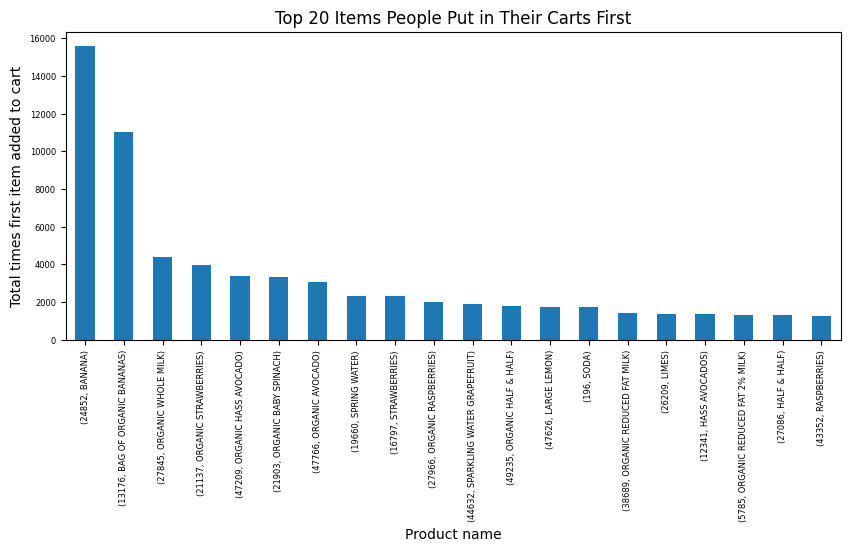

In [52]:
graph_order_prod_add_first_20.plot(kind='bar', 
                title='Top 20 Items People Put in Their Carts First',
                xlabel='Product name',
                ylabel='Total times first item added to cart',
                fontsize=6,
                figsize=[10,4],)
plt.show()

Escribe aquí tus conclusiones

Como muestra, se puede observar que las bananas son el artículo que las personas agregan primero en sus carritos, seguido por otros productos orgánicos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

### Conclusion general del proyecto:


In [ ]:
"""
Personalmente este proyecto me ha parecido muy retador e interesante, una de las cosas que más puedo destacar es la en esta ocasión no se proporcionó toda la información como se hizo en los proyectos anteriores, 
lo cual me parece es una buena práctica para los estudiantes, pues en ocasiones en caso reales se debe aprender a solucionar este tipo de problemas aun cuando no se tiene clara la información. 
También puedo destacar que se me hizo difícil seleccionar las herramientas adecuadas para resolver algunos de los casos de este proyecto, 
sin embargo espero tener correcciones para saber en qué estoy fallando y encaminarme a mejorar en mis áreas de oportunidad. 
"""
